# Basic example of Analyzer use and functions

In [44]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import os
import numpy as np
import spikeinterface as si
import spiketoolkit as stk
import matplotlib.pylab as plt

### Define local recording folder

In [46]:
rec_folder = '/home/alessiob/Documents/Codes/MEArec/recordings/recordings_20cells_Neuropixels-128_10.0_10.0uV_28-09-2018:15:39'

Instantiate Input and Output Extractors for MEArec recordings

In [125]:
input_ext = si.MEArecInputExtractor(recording_folder=rec_folder)
output_ext = si.MEArecOutputExtractor(recording_folder=rec_folder)

Create Analyzer object

In [126]:
analyze = stk.Analyzer(input_ext, output_ext)

None
Loading recordings from folder...
Done loading recordings...


### Get Input and Output Extractor objects

In [127]:
ie = analyze.inputExtractor()
print(ie)

In [128]:
oe = analyze.outputExtractor()
print(oe.getUnitIds())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Get waveforms, compute templates, compute max channel, and plot

In [157]:
wf = analyze.getUnitWaveforms()
print(len(analyze._waveforms))

20


In [130]:
template = analyze.computeUnitTemplate()
print(len(analyze._templates))

20


In [158]:
max_chan = analyze.computeMaxChannel()
print(len(analyze._maxchannels))

20


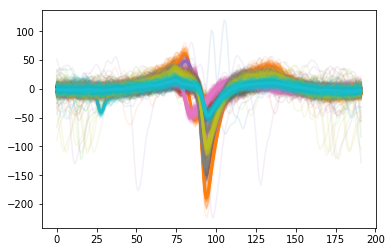

In [107]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(len(wf)):
    plt.plot(wf[i][:, max_chan[i]].T, color=colors[np.mod(i, len(colors))], alpha = 0.1)
    plt.plot(template[i][max_chan[i]], color=colors[np.mod(i, len(colors))], lw = 3)

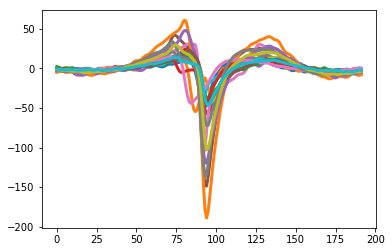

In [160]:
for i in range(len(wf)):
    plt.plot(template[i][max_chan[i]], color=colors[np.mod(i, len(colors))], lw = 3)

In [155]:
pca_scores, var = analyze.computePCAscores()

(48, 24576)
Fitting PCA of 10 dimensions


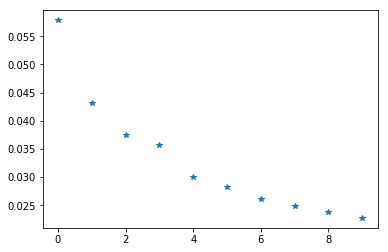

In [156]:
plt.plot(var, '*')

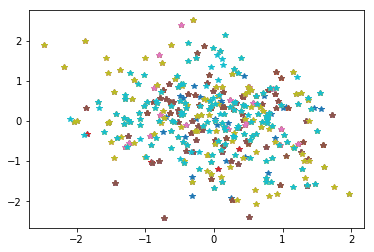

In [159]:
for i in range(len(wf)):
    plt.plot(pca_scores[i][:, 0], pca_scores[i][:, 1], marker='*', ls='', color=colors[np.mod(i, len(colors))])